# NYS REGENTS Highschool State Examination Scores
## An analysis and regression of scores from 2014-2019
### Author: Jack Robbins

**DATASET USED**: https://data.cityofnewyork.us/Education/2014-15-to-2017-19-NYC-Regents-Exam-Results-Public/bnea-fu3k/about_data

In [142]:
# Important imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import r_regression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error
import statsmodels.api as sm
from matplotlib.gridspec import GridSpec

In [143]:
# Read in our dataframe
scores = pd.read_csv("data/2014-15_to_2017-19_NYC_Regents_Exam_Results_-_Public_20241026.csv")

In [144]:
scores

,Unnamed Column,School DBN,School Name,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Number Scoring Below 65,Percent Scoring Below 65,Number Scoring 65 or Above,Percent Scoring 65 or Above,Number Scoring 80 or Above,Percent Scoring 80 or Above,Number Scoring CR,Percent Scoring CR
0,08X5072015All StudentsGeometry,08X507,Stevenson Yabc,YABC,High school,Geometry,2015,All Students,1,s,s,s,s,s,s,s,s,s
1,01M1842018All StudentsLiving Environment,01M184,P.S. 184m Shuang Wen,General Academic,K-8,Living Environment,2018,All Students,32,90.2,0,0.0,32,100.0,31,96.9,na,na
2,01M4582019All StudentsSpanish,01M458,Forsyth Satellite Academy,Transfer School,High school,Spanish,2019,All Students,1,s,s,s,s,s,s,s,s,s
3,01M5092017All StudentsSpanish,01M509,Marta Valle High School,General Academic,High school,Spanish,2017,All Students,16,82.7,0,0.0,16,100.0,10,62.5,na,na
4,02M2982015All StudentsGeometry,02M298,Pace High School,General Academic,High school,Geometry,2015,All Students,163,62.9,81,49.7,82,50.3,13,8.0,13,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33026,84X7172017All StudentsLiving Environment,84X717,Icahn Charter School,General Academic,K-8,Living Environment,2017,All Students,10,79.7,0,0.0,10,100.0,5,50.0,na,na
33027,84X7172018All StudentsCommon Core Algebra,84X717,Icahn Charter School,General Academic,K-8,Common Core Algebra,2018,All Students,15,86.9,0,0.0,15,100.0,15,100.0,15,100.0
33028,84X7172018All StudentsLiving Environment,84X717,Icahn Charter School,General Academic,K-8,Living Environment,2018,All Students,9,85.3,0,0.0,9,100.0,8,88.9,na,na
33029,84X7172019All StudentsCommon Core Algebra,84X717,Icahn Charter School,General Academic,K-8,Common Core Algebra,2019,All Students,15,93.2,0,0.0,15,100.0,15,100.0,15,100.0


In [145]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33031 entries, 0 to 33030
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed Column               33031 non-null  object
 1   School DBN                   33031 non-null  object
 2   School Name                  33031 non-null  object
 3   School Type                  33031 non-null  object
 4   School Level                 33031 non-null  object
 5   Regents Exam                 33031 non-null  object
 6   Year                         33031 non-null  int64 
 7   Category                     33031 non-null  object
 8   Total Tested                 33031 non-null  int64 
 9   Mean Score                   33031 non-null  object
 10  Number Scoring Below 65      33031 non-null  object
 11  Percent Scoring Below 65     33031 non-null  object
 12  Number Scoring 65 or Above   33031 non-null  object
 13  Percent Scoring 65 or Above  33

## Response and predictor variables
For this project, I am intereset in predicting the percent of students who score 85 or above on the exam. I suspect that this can be
predicted using School Type, School Level, Year, Exam type, category and the mean score. As such, I am going to remove everything that is not those scores just so that I can filter through the noise.

## Data Preprocessing
As we can see from above, this data is quite a mess with unnamed columns, weird concatenations and other issues. We'll have to clean it up before using it

### Dropping Columns
The following columns are either meaningless or it is not documented as to what they even are, they are as follows:
- Unnamed Column: appears to be a concatenation of "category", "school dbn" and the REGENTS exam type
- School DBN/Name: these are both unique identifiers, and really won't help us much
- Number & percent scoring CR: it is completely undocumented as to what these columns even mean. As such they won't be a help to us

These columns will all be dropped just to clear up the noise in this dataset

In [146]:
# Dropping the mentioned columns
scores.drop(['Unnamed Column', 'School DBN', 'School Name', 'Number Scoring CR', 'Percent Scoring CR',\
            "Number Scoring Below 65", "Percent Scoring Below 65", "Number Scoring 65 or Above",\
            "Percent Scoring 65 or Above", "Number Scoring 80 or Above"], axis=1, inplace=True)
scores

,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Percent Scoring 80 or Above
0,YABC,High school,Geometry,2015,All Students,1,s,s
1,General Academic,K-8,Living Environment,2018,All Students,32,90.2,96.9
2,Transfer School,High school,Spanish,2019,All Students,1,s,s
3,General Academic,High school,Spanish,2017,All Students,16,82.7,62.5
4,General Academic,High school,Geometry,2015,All Students,163,62.9,8.0
...,...,...,...,...,...,...,...,...
33026,General Academic,K-8,Living Environment,2017,All Students,10,79.7,50.0
33027,General Academic,K-8,Common Core Algebra,2018,All Students,15,86.9,100.0
33028,General Academic,K-8,Living Environment,2018,All Students,9,85.3,88.9
33029,General Academic,K-8,Common Core Algebra,2019,All Students,15,93.2,100.0


### Rows with few students who took the exam
Looking at the data above reveals that there are some rows that have schools/tests where 1 student took the exam. These are not of much interest to us, so we'll remove any row where less than 10 students took the exam.

In [147]:
indices_to_drop = scores[scores["Total Tested"] < 10].index
scores.drop(indices_to_drop, axis=0, inplace=True)

In [148]:
scores

,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Percent Scoring 80 or Above
1,General Academic,K-8,Living Environment,2018,All Students,32,90.2,96.9
3,General Academic,High school,Spanish,2017,All Students,16,82.7,62.5
4,General Academic,High school,Geometry,2015,All Students,163,62.9,8.0
7,General Academic,High school,French,2019,All Students,21,81.5,52.4
8,General Academic,High school,English,2015,All Students,128,87.4,87.5
...,...,...,...,...,...,...,...,...
33024,General Academic,K-8,Common Core Algebra,2017,All Students,12,87.7,91.7
33026,General Academic,K-8,Living Environment,2017,All Students,10,79.7,50.0
33027,General Academic,K-8,Common Core Algebra,2018,All Students,15,86.9,100.0
33029,General Academic,K-8,Common Core Algebra,2019,All Students,15,93.2,100.0


So we've now got data where 10 or more students took the exam

### Looking for bad values using unique()
We can use the unique() function to find any bad data in our categorical columns pretty easily. If we find it, we can action upon it

In [149]:
# Let's test the year. It looks like we're all clear for this here too.
scores["Year"].unique()

array([2018, 2017, 2015, 2019, 2016])

In [150]:
# Let's test the School Type. Looks all good to me
scores["School Type"].unique()

array(['General Academic', 'Transfer School', 'Special Education',
       'Career Technical', 'YABC'], dtype=object)

In [151]:
# Let's test the school level
scores["School Level"].unique()

array(['K-8', 'High school', 'Junior High-Intermediate-Middle',
       'Secondary School', 'K-12 all grades', 'Elementary', 'Ungraded'],
      dtype=object)

### Dealing with weird values in School Level
As we can see we do have some weird values in here. We will eliminate the Secondary School option as this is just highschool, and we will also remove the ungraded school as well as this won't help us in a later analysis.

In [152]:
indices_to_drop = scores[~(scores["School Level"].isin(['K-8', 'High school', 'Junior High-Intermediate-Middle', 'K-12 all grades', 'Elementary']))].index
scores.drop(indices_to_drop, axis=0, inplace=True)
scores

,School Type,School Level,Regents Exam,Year,Category,Total Tested,Mean Score,Percent Scoring 80 or Above
1,General Academic,K-8,Living Environment,2018,All Students,32,90.2,96.9
3,General Academic,High school,Spanish,2017,All Students,16,82.7,62.5
4,General Academic,High school,Geometry,2015,All Students,163,62.9,8.0
7,General Academic,High school,French,2019,All Students,21,81.5,52.4
8,General Academic,High school,English,2015,All Students,128,87.4,87.5
...,...,...,...,...,...,...,...,...
33024,General Academic,K-8,Common Core Algebra,2017,All Students,12,87.7,91.7
33026,General Academic,K-8,Living Environment,2017,All Students,10,79.7,50.0
33027,General Academic,K-8,Common Core Algebra,2018,All Students,15,86.9,100.0
33029,General Academic,K-8,Common Core Algebra,2019,All Students,15,93.2,100.0


In [153]:
# Let's test the regents exam as well. This looks to be in the clear to me
scores["Regents Exam"].unique()

array(['Living Environment', 'Spanish', 'Geometry', 'French', 'English',
       'Common Core Algebra', 'Common Core English',
       'Common Core Geometry', 'Global History and Geography',
       'Integrated Algebra', 'Physical Settings/Earth Science',
       'U.S. History and Government', 'Common Core Algebra2',
       'Physical Settings/Chemistry', 'Algebra2/Trigonometry', 'Chinese',
       'Physical Settings/Physics', 'Italian'], dtype=object)

In [154]:
# Let's finally test the category
scores["Category"].unique()

array(['All Students'], dtype=object)

### A surprise find
I'm glad that I did this. As we can see, this column is completely useless because every single value is 'All Students'. We can drop it as a result.

In [155]:
scores.drop('Category', axis=1, inplace=True)
scores

,School Type,School Level,Regents Exam,Year,Total Tested,Mean Score,Percent Scoring 80 or Above
1,General Academic,K-8,Living Environment,2018,32,90.2,96.9
3,General Academic,High school,Spanish,2017,16,82.7,62.5
4,General Academic,High school,Geometry,2015,163,62.9,8.0
7,General Academic,High school,French,2019,21,81.5,52.4
8,General Academic,High school,English,2015,128,87.4,87.5
...,...,...,...,...,...,...,...
33024,General Academic,K-8,Common Core Algebra,2017,12,87.7,91.7
33026,General Academic,K-8,Living Environment,2017,10,79.7,50.0
33027,General Academic,K-8,Common Core Algebra,2018,15,86.9,100.0
33029,General Academic,K-8,Common Core Algebra,2019,15,93.2,100.0


In [156]:
# Do we have any Null values?
null_values=scores.isnull().sum()
print("Detecting missing values:\n", null_values)

Detecting missing values:
 School Type                    0
School Level                   0
Regents Exam                   0
Year                           0
Total Tested                   0
Mean Score                     0
Percent Scoring 80 or Above    0
dtype: int64


So there are no "null" values here, but that is deceptive. It seems that whomever entered these data actually typed in "na" wherever they meant to write null. As such, we'll have to clean these out in the data.

In [157]:
scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24147 entries, 1 to 33030
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   School Type                  24147 non-null  object
 1   School Level                 24147 non-null  object
 2   Regents Exam                 24147 non-null  object
 3   Year                         24147 non-null  int64 
 4   Total Tested                 24147 non-null  int64 
 5   Mean Score                   24147 non-null  object
 6   Percent Scoring 80 or Above  24147 non-null  object
dtypes: int64(2), object(5)
memory usage: 1.5+ MB


### Converting numerical columns into numbers
As we can see above, columns that should be numeric are actually registered as objects. This won't help us in our regression, so we'll need to fix this.

In [158]:
scores["Mean Score"] = scores["Mean Score"].apply(lambda x: float(x))
scores["Percent Scoring 80 or Above"] = scores["Percent Scoring 80 or Above"].apply(lambda x: float(x))

scores.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24147 entries, 1 to 33030
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   School Type                  24147 non-null  object 
 1   School Level                 24147 non-null  object 
 2   Regents Exam                 24147 non-null  object 
 3   Year                         24147 non-null  int64  
 4   Total Tested                 24147 non-null  int64  
 5   Mean Score                   24147 non-null  float64
 6   Percent Scoring 80 or Above  24147 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB


### Encoding Categorical Data
Now that the data has been cleaned, we'll need to encode our 3 categorical columns for use in our regression

In [159]:
school_type_le = preprocessing.LabelEncoder()
school_level_le = preprocessing.LabelEncoder()
regents_exam_le = preprocessing.LabelEncoder()

scores['School Type'] = school_type_le.fit_transform(scores['School Type'])
scores['School Level'] = school_level_le.fit_transform(scores['School Level'])
scores['Regents Exam'] = regents_exam_le.fit_transform(scores['Regents Exam'])

scores

,School Type,School Level,Regents Exam,Year,Total Tested,Mean Score,Percent Scoring 80 or Above
1,1,4,12,2018,32,90.2,96.9
3,1,1,16,2017,16,82.7,62.5
4,1,1,8,2015,163,62.9,8.0
7,1,1,7,2019,21,81.5,52.4
8,1,1,6,2015,128,87.4,87.5
...,...,...,...,...,...,...,...
33024,1,4,2,2017,12,87.7,91.7
33026,1,4,12,2017,10,79.7,50.0
33027,1,4,2,2018,15,86.9,100.0
33029,1,4,2,2019,15,93.2,100.0


## Data Visualization - Hunting for correlations and patterns
I suspect that there is a correlation between the year, mean score and percent who score 80 or above. I can test this hunch visually by making a 3d graph with the previous 2 as predictors and the later as the response. As we can see from the graph, there does appear to be a positive linear relationship between the two.

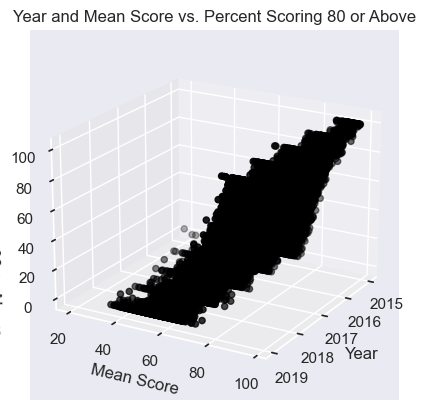

In [160]:
# Set up the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the points
ax.scatter3D(scores["Year"], scores["Mean Score"], scores["Percent Scoring 80 or Above"], color="Black")

# Axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Mean Score')
ax.set_zlabel('Percent Scoring 80 or Above')
ax.set_title('Year and Mean Score vs. Percent Scoring 80 or Above')
# Set the view angle
ax.view_init(20, 30)

There may also be a correlation between the REGENTS test and the year and mean score. Let's test this as well.

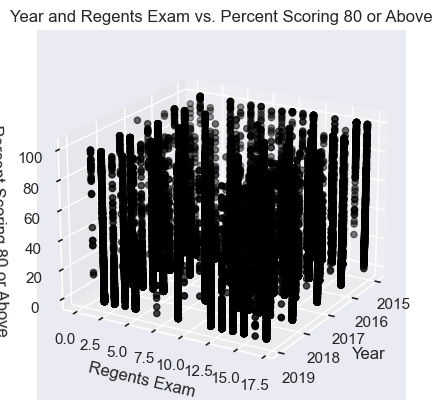

In [161]:
# Set up the figure
fig = plt.figure()
ax = plt.axes(projection='3d')
# Plot the points
ax.scatter3D(scores["Year"], scores["Regents Exam"], scores["Percent Scoring 80 or Above"], color="Black")

# Axes labels
ax.set_xlabel('Year')
ax.set_ylabel('Regents Exam')
ax.set_zlabel('Percent Scoring 80 or Above')
ax.set_title('Year and Regents Exam vs. Percent Scoring 80 or Above')
# Set the view angle
ax.view_init(20, 30)

### Heatmap visualization
Let's create a heatmap to visualize the relationship between individual variables. Since we will be doing a multivariate analysis here, we actually want to use variable that *are not* corrleated with one another

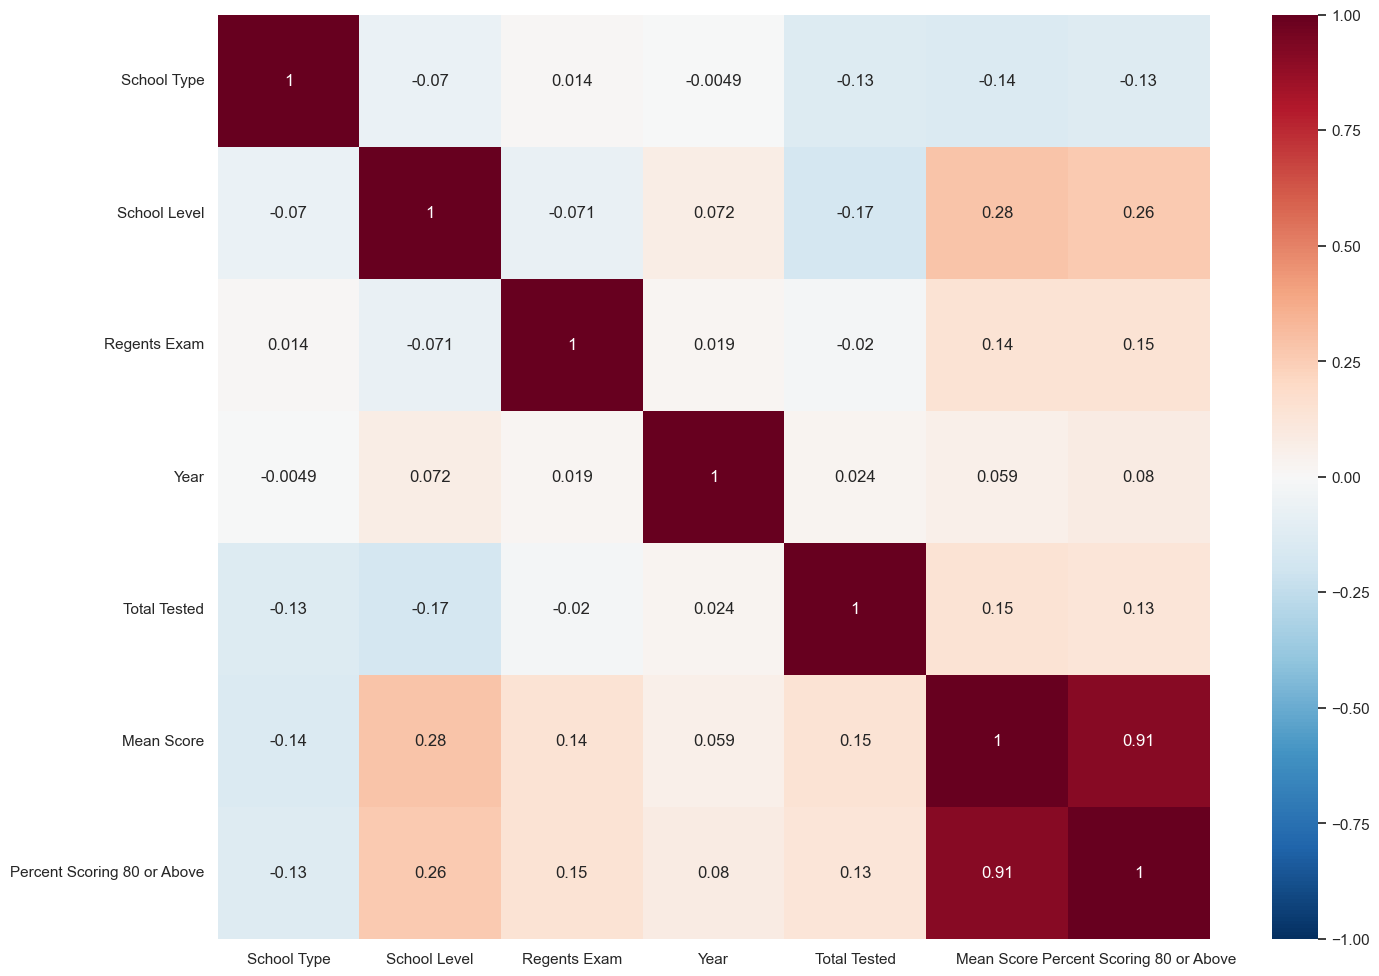

In [162]:
display(HTML("<style>.container { width:100% !important; }</style>"))
corr = scores.corr(method='pearson')
sns.set(font_scale=1)
plt.figure(figsize=(16,12))
sns_plot = sns.heatmap(
    corr,        
    cmap='RdBu_r', 
    annot=True, 
    vmin=-1, vmax=1);

So we can see that 1-to-1 our variables here don't have a very strong pattern, besides from numerical features that are likely to be highly correlated like number scoring 65 or above and percent scoring 65 or above. This means that we should be good to use features like Year, REGENTS exam and mean score in our model.

### Pairplot Visualization

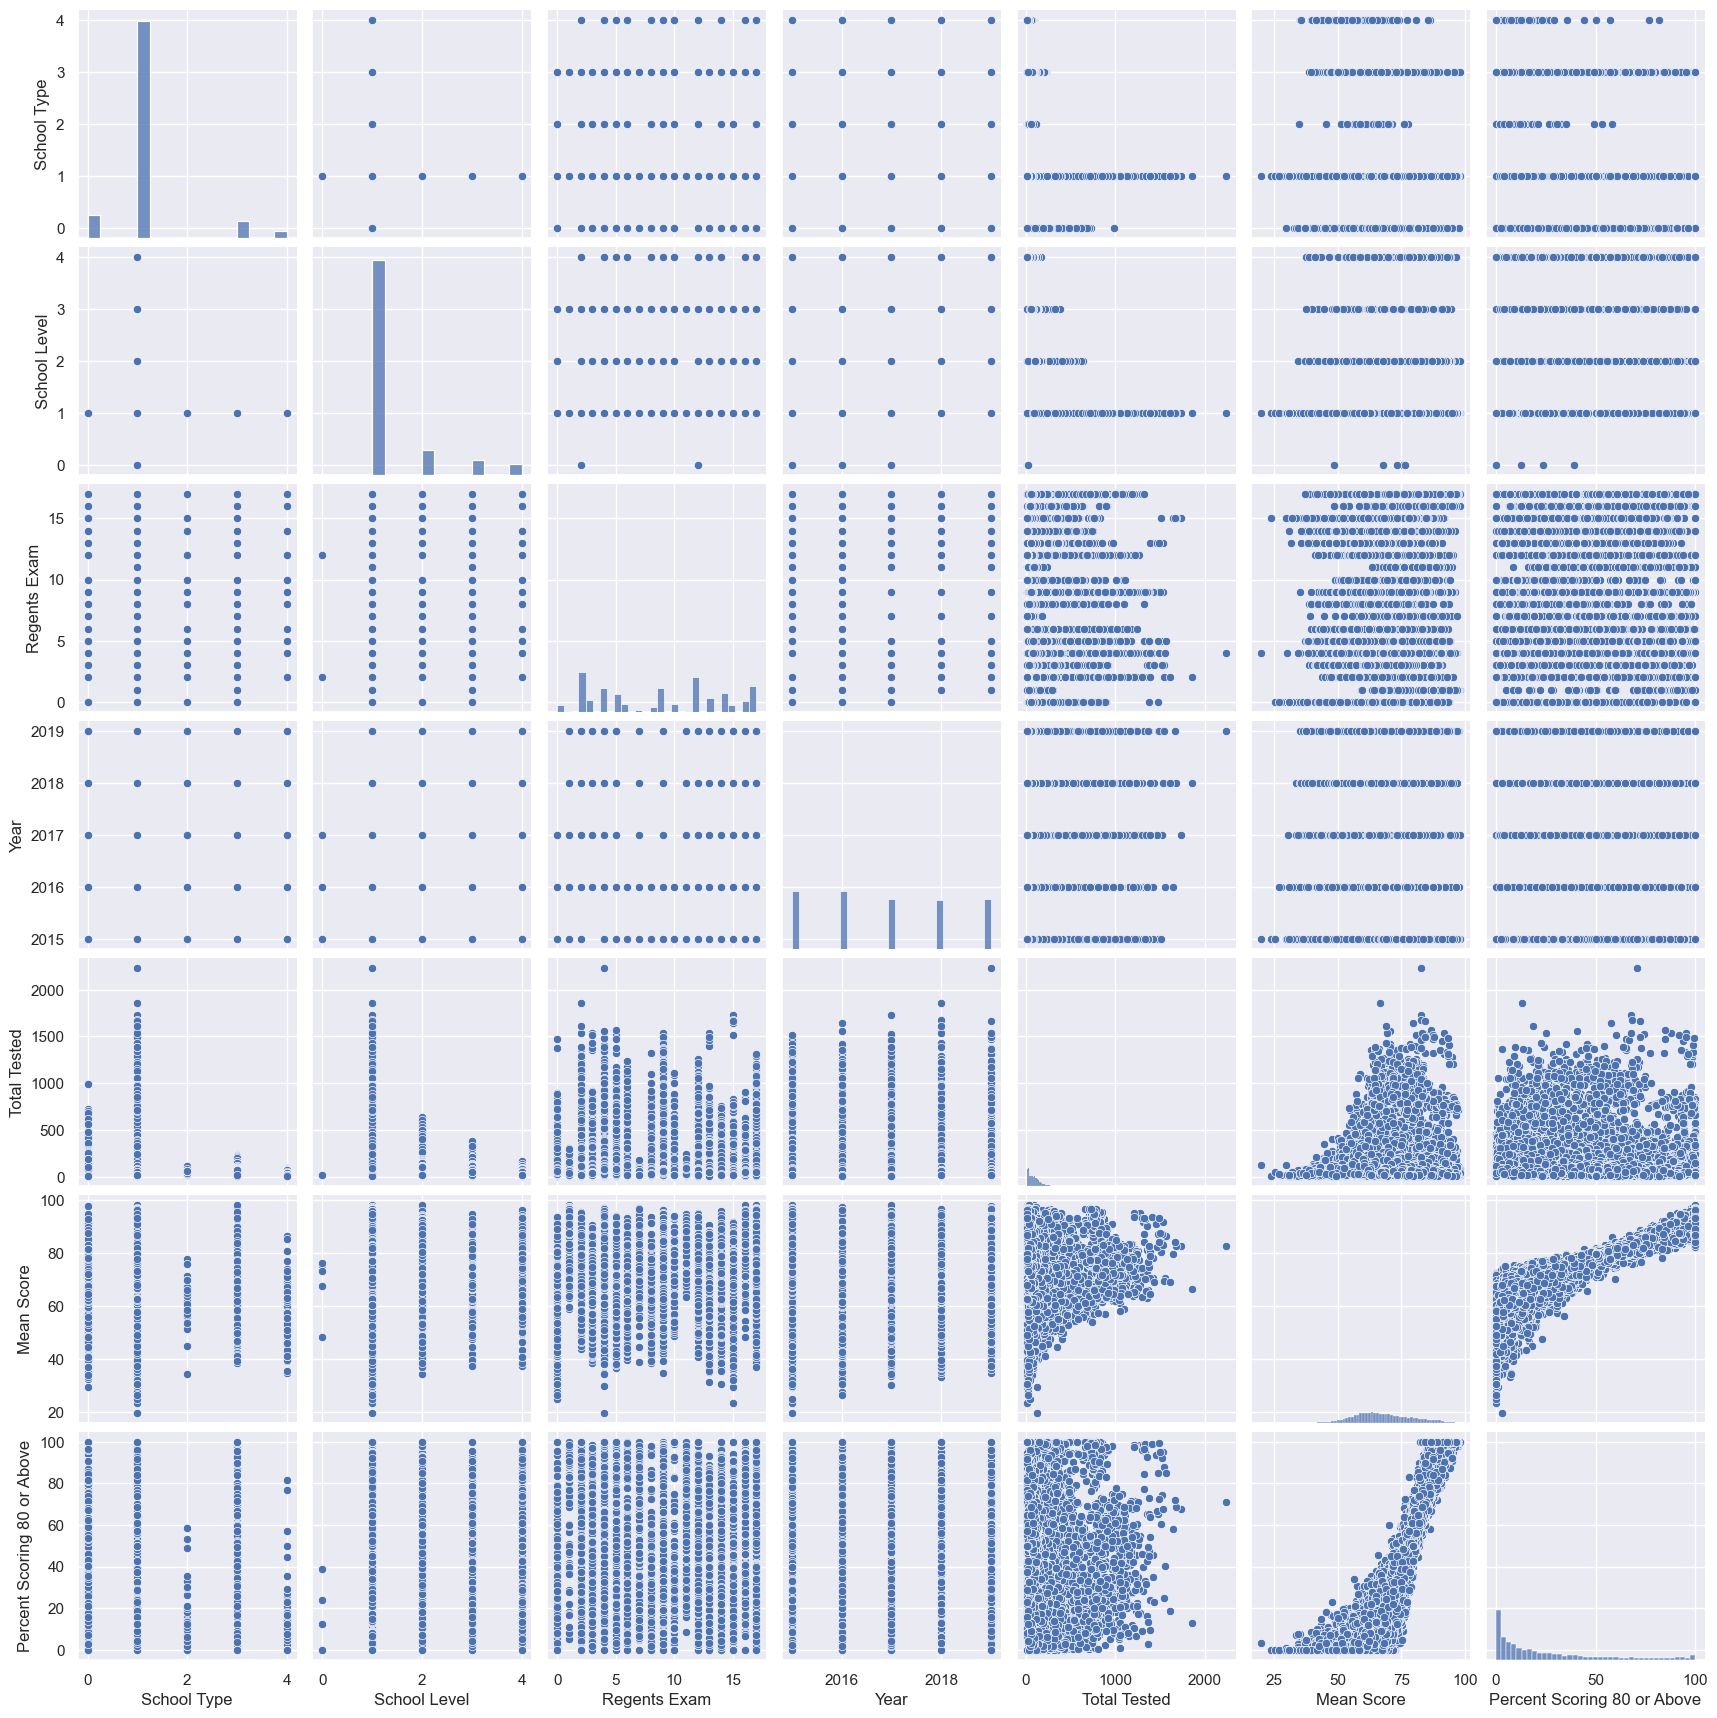

In [163]:
sns.pairplot(scores)

Our Pairplot here shows us that there is a very strong relationship between mean score and percent scoring 80 or above. Although it doesn't show any particularly strong relationships for our other predictors, we may be able to tease those out during backwards selection

### Splitting the data into testing and training datasets

In [164]:
X = scores[["School Type", "School Level", "Year", "Regents Exam", "Total Tested", "Mean Score"]].values
y = scores["Percent Scoring 80 or Above"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 410)

## Creating a regression model
For our regression model, we will attempt to predict the percent of students who score 80 or above. We will start off using School Type, School Level, Year, which Regents exam they used, the total number of students tested and the mean score of the group. 

Why do we use percent scoring 80 or above? If we used the total number of students who scored 80 or above, that would be very nearly tied to the total number tested in that school, and would bias our model.

What about the other features? The other features are also numerically related to the number of students, and as such are likely to be correlated with eachother. This is suboptimal for our linear model. We want parameters that are correlated to the target variable(Number who scored 90 or above)

In [165]:
# Fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [166]:
lm.score(X_test, y_test)

0.8309883766112862

We get an accuarcy score of 0.831 or 83.1%, which is pretty great! But, we may be able to make it better if we do some backwards selection here.

In [167]:
# Let's see what our P-values look like here
model = sm.OLS(y_train, X_train)
est = model.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          3.161e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:50:47   Log-Likelihood:                         -75311.
No. Observations:               19317   AIC:                                  1.506e+05
Df Residuals:                   19311   BIC:                                  1.507e+05
Df Model:                           6                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

### Backwards selection
According to the P-values here, we should eliminate x1 first. This corresponds to the school type. Let's eliminate and rerun our scoring

In [168]:
X = scores[["School Level", "Year", "Regents Exam", "Total Tested", "Mean Score"]].values
y = scores["Percent Scoring 80 or Above"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 410)

# Fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.8309856474566089

So yes, it looks like that feature had basically 0 effect on our model. Let's test again and keep going

In [169]:
# Let's see what our P-values look like here
model = sm.OLS(y_train, X_train)
est = model.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          3.793e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:50:47   Log-Likelihood:                         -75312.
No. Observations:               19317   AIC:                                  1.506e+05
Df Residuals:                   19312   BIC:                                  1.507e+05
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Based on this, we should remove x4(Total tested) from our model, so let's try that

In [170]:
X = scores[["School Level", "Year", "Regents Exam", "Mean Score"]].values
y = scores["Percent Scoring 80 or Above"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 410)

# Fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.8309667235245106

So again yes, it looks like that feature had basically 0 effect on our model. Let's remove the next highest(X2, School Type) and keep going

In [171]:
# Let's see what our P-values look like here
model = sm.OLS(y_train, X_train)
est = model.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          4.741e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:50:47   Log-Likelihood:                         -75312.
No. Observations:               19317   AIC:                                  1.506e+05
Df Residuals:                   19313   BIC:                                  1.507e+05
Df Model:                           4                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Finally here, it looks like we should eliminate x1(School level) from our model

In [172]:
X = scores[["Year", "Regents Exam", "Mean Score"]].values
y = scores["Percent Scoring 80 or Above"].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 410)

# Fitting the model
lm = LinearRegression()
lm.fit(X_train, y_train)

lm.score(X_test, y_test)

0.8309452326452862

In [173]:
# Let's see what our P-values look like here
model = sm.OLS(y_train, X_train)
est = model.fit()
print(est.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.908
Model:                            OLS   Adj. R-squared (uncentered):              0.908
Method:                 Least Squares   F-statistic:                          6.322e+04
Date:                Wed, 30 Oct 2024   Prob (F-statistic):                        0.00
Time:                        10:50:47   Log-Likelihood:                         -75312.
No. Observations:               19317   AIC:                                  1.506e+05
Df Residuals:                   19314   BIC:                                  1.507e+05
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

And there we have it, the remaining 3 features(Year, Regents Exam type and mean score) are all that we need to predict the percent of students who score 80 or above on their regents exam

## Linear Model Produced
Our linear model is as follows:

In [174]:
print("Predicted % 80 or above = ", lm.intercept_, " + ", 
                                    lm.coef_[0], " * (Year) + ",
                                    lm.coef_[1], " * (REGENTS Exam) + ",
                                    lm.coef_[2], " * (Mean Score)"
    )

Predicted % 80 or above =  -1188.6314786124185  +  0.5280097255827774  * (Year) +  0.09243837891876838  * (REGENTS Exam) +  2.215459006379641  * (Mean Score)


## Regression Equation
### Predicted % 80 or above =  $-1188.63 +  0.53 * $(Year)$ +  0.092 * $(Exam)$ +  2.22  * $(Mean_Score)

## Sample Prediction

Let's use our model to make a prediction for a school who took the Algebra II Exam in 2018, with a mean score of 65%

In [175]:
exam = regents_exam_le.transform(["Common Core Algebra2"])[0]
input_vector = [[2018, exam, 65]]
input_vector

[[2018, 3, 65]]

In [176]:
lm.predict(input_vector)

array([21.17429817])

So, we'd predict that about 21% of students in this school on this exam would score 80% or above

## Scoring our model
We've done a little bit of this before, but let's do it again over here just to have it in one section

In [177]:
# Find r^2 value
lm.score(X_test, y_test)

0.8309452326452862

As we can see here, our model has an r^2 value of 0.831. This means that 83.1% of the variation in the mean score is explained by our model, making this model very good. Let's use another metric to score our model.

**Using Root Mean-Squared Error and Mean Absolute Error**
Let's also use the root mean squared error to see how far our model was off by on average

In [178]:
y_pred = lm.predict(X_test)
root_mean_squared_error(y_test, y_pred)

11.73060391067455

In [179]:
mean_absolute_error(y_test, y_pred)

9.217167185174612

## Conclusions on error
Our mean absolute error and mean square error are both around 10. This means that any given prediction is on average 10 percentage points off in either direction. While this is not the most ideal result, it does prove that our model is able to predict, with a reasonable amount of accuracy, the percentage of students who will score 80 or above on a given regents exam given the year and mean score.